# Машинное обучение, DS-поток
## Задание ML.15


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 20 баллов;
* Задача 2 &mdash; 100 баллов.

In [2]:
# Bot check

# HW_ID: ds_ml15
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from warnings import filterwarnings

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
filterwarnings('ignore', category=FutureWarning)

---
### Задача 1 
Проведите свое исследование датасета из `data.txt` на кластеризацию изученными методами, реализованными в sklearn:

- k-means;
- DBSCAN;
- Иерархическая кластеризация.

Для каждого метода выше обоснуйте, почему выбранные вами гиперпараметры оптимальны, исходя из внутренней структуры данных. Если вы не можете применить какой-то из методов на этих данных, то обоснуйте, почему.

*Примечание.* Задача является небольшим упражнением и не предполагает большое исследование.

In [4]:
data = np.loadtxt('data.txt')
data

array([[5.81640e+02, 8.13431e+05],
       [5.81600e+02, 8.45140e+04],
       [5.81480e+02, 5.50001e+05],
       ...,
       [2.88571e+03, 8.06890e+05],
       [2.88575e+03, 3.18803e+05],
       [2.88587e+03, 8.66362e+05]])

Предварительно нанесем все на график

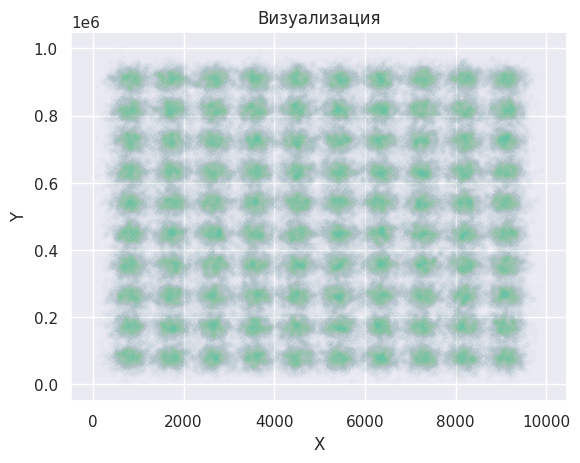

In [5]:
data = np.loadtxt('data.txt')

plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.01)
plt.title("Визуализация")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Откуда видно, что структура - это 100 кластеров, расположенных в решетке 10x10

Сначала k-means. Ясно, что нам нужно 100 кластеров

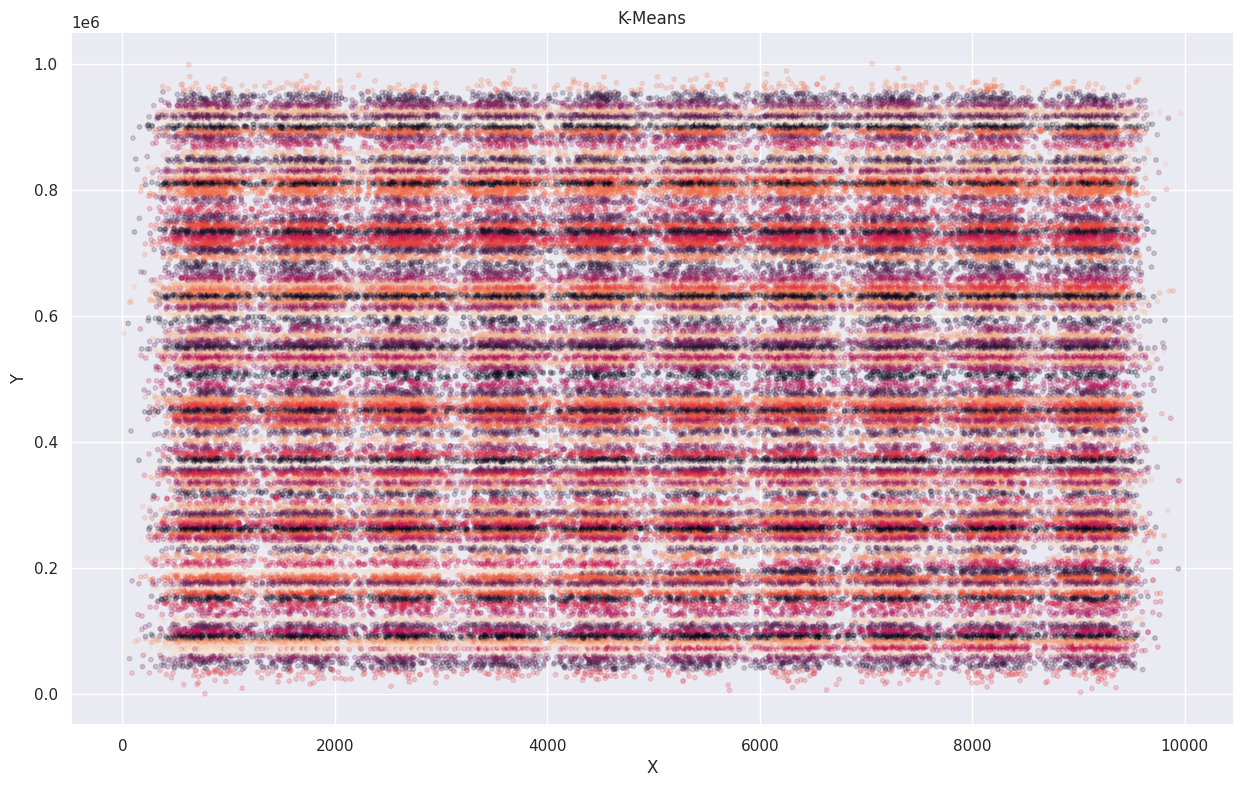

In [6]:
kmeans = KMeans(n_clusters=100,
                max_iter=5000)
kmeans.fit(data)
labels_kmeans = kmeans.predict(data)

plt.figure(figsize=(15, 9))
plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, s=10, alpha=0.2)
plt.title("K-Means")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.show()

Видно, что кластеризация страдает - все вырождается в полоски. Это из за сильно разных масштабов вдоль осей. Проведем стандартизацию, будем работать уже со стандартизированными данными

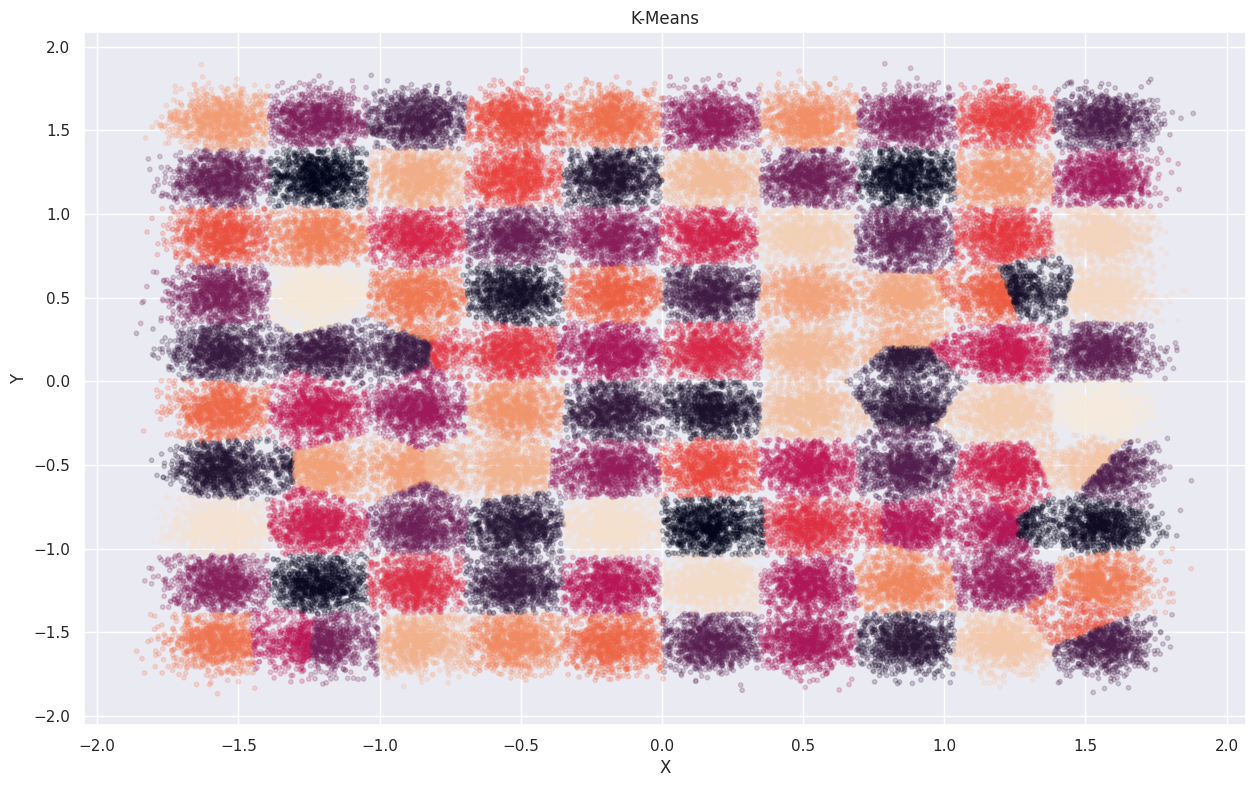

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=100,
                max_iter=5000)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.predict(data_scaled)

plt.figure(figsize=(15, 9))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],
            c=labels_kmeans, s=10, alpha=0.2)
plt.title("K-Means")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

В целом K-Means улавливает решетчатую стрктуру, но метсами кластеризация не очень удачная - когда делится кластер пополам. Слишком близко находятся между собой узлы решетки

/tmp/ipykernel_134865/711314385.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", markerscale=2, fontsize=9)


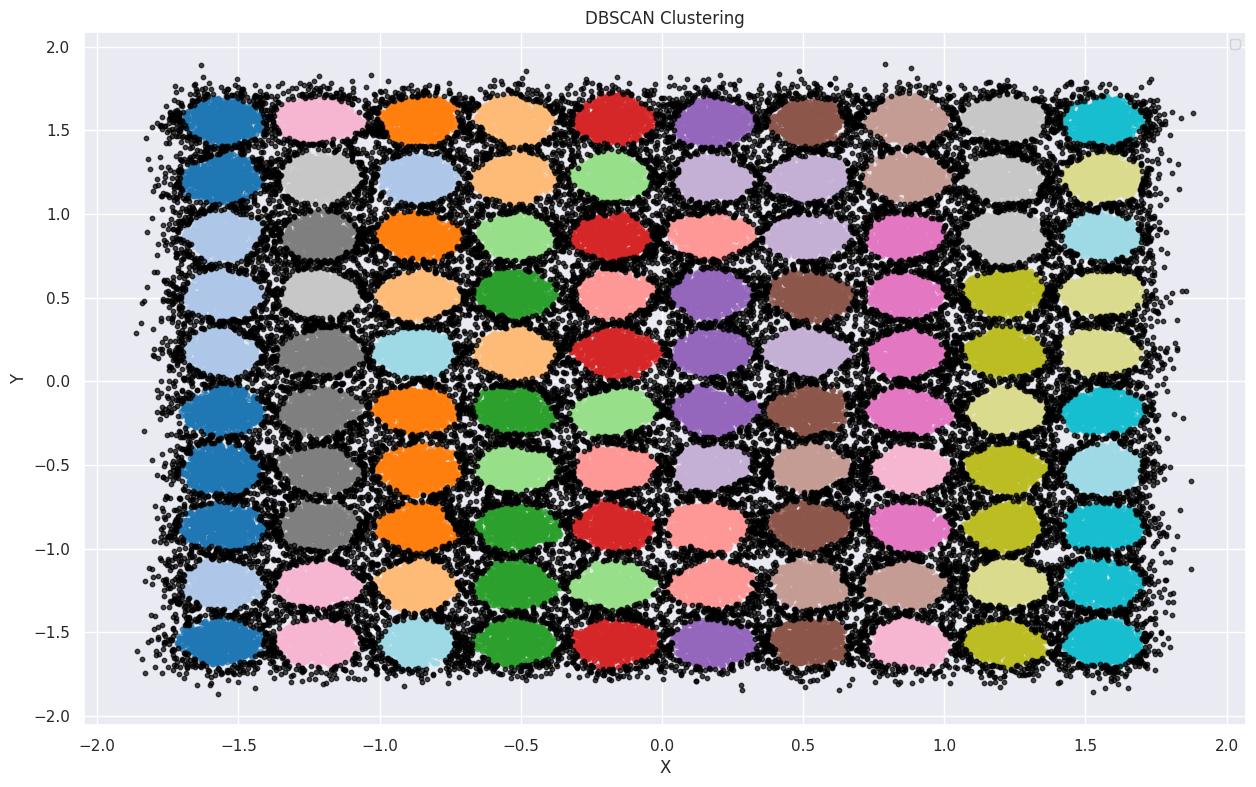

In [8]:
dbscan = DBSCAN(eps=0.05, min_samples=90)
labels_dbscan = dbscan.fit_predict(data_scaled)

plt.figure(figsize=(15, 9))

unique_labels = set(labels_dbscan)

colors = [plt.cm.tab20(i / float(len(unique_labels))) for i in range(len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'

    plt.scatter(
        data_scaled[labels_dbscan == label, 0],
        data_scaled[labels_dbscan == label, 1],
        c=[color],
        s=10,
        alpha=0.7,
        edgecolor='k' if label == -1 else None
    )

plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best", markerscale=2, fontsize=9)
plt.show()

Здесь уже ловится вся структура, и каждый из узел детектируется правильно. Пришлось подбирать параметры

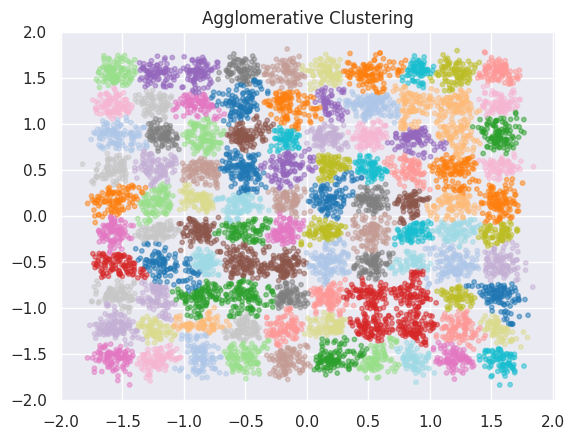

In [9]:
agg_clustering = AgglomerativeClustering(n_clusters=100,
                                         linkage='ward')

subset_size = 9000
indices = np.random.choice(len(data_scaled), subset_size, replace=False)
data_subset = data_scaled[indices]

labels_agg = agg_clustering.fit_predict(data_subset)

plt.scatter(data_subset[:, 0], data_subset[:, 1], c=labels_agg,
            cmap='tab20', s=10, alpha=0.5)
plt.title("Agglomerative Clustering")
plt.show()

Тут уже надо брать подвыборку, потому что на всех данных обучиться не хватает памяти.

Итого

kmeans - Быстрый, подходит для равномерных кластеров

DBSCAN - требует донастройку, более точный

Иерархическая - сложно на больших данных, более хаотичное предсказание, чем у всех остальных

---
### Задача 2
Скачайте <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">данные</a> о клиентах некоторой торговой сети.

Цель задачи &mdash; кластеризовать клиентов с целью модификации продукта под разные типы пользовательских кластеров. Например, вместо того, чтобы тратиться на продвижение нового продукта каждому клиенту, можно продавать продукт только в том кластере, где клиенты с наибольшей вероятностью его купят.

In [70]:
data = pd.read_csv("./marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Посмотрим на признаки. Прочитайте также информацию о признаках на странице данных.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Посмотрим на диапазон дат регистрации

In [72]:
data["Dt_Customer"].min(), data["Dt_Customer"].max()

('01-01-2013', '31-12-2013')

Кажется, данные выгружены в конце 2014 года, соответственно, определим дату анализа

In [73]:
end_date = pd.Timestamp('2015-01-01')

Посчитаем для каждого клиента количество дней с момента регистрации

In [74]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
data["usage_time"] = (end_date - data["Dt_Customer"]) / pd.Timedelta('1 day')
data["usage_time"]

0       849.0
1       299.0
2       498.0
3       325.0
4       347.0
        ...  
2235    567.0
2236    205.0
2237    341.0
2238    342.0
2239    808.0
Name: usage_time, Length: 2240, dtype: float64

Создайте следующие признаки:
* возраст клиента на основе даты рождения
* сумма покупок по всем категориям
* общее количество детей, сложив `Kidhome` и `Teenhome`
* на основе количества детей и семейного положения (`Marital_Status`) определите *предполагаемый* размер семьи
* средние траты клиента в день в период пользования сервисом, поделив суммарные траты на количество дней от даты регистрации (*см. примечание далее*)

In [75]:
data["Age"] = end_date.year - data["Year_Birth"]

purchase_columns = ["MntWines", "MntFruits", "MntMeatProducts",
                    "MntFishProducts", "MntSweetProducts",
                    "MntGoldProds"]
data["Total_Spending"] = data[purchase_columns].sum(axis=1)

data["Total_Children"] = data["Kidhome"] + data["Teenhome"]

data["Family_Size"] = data["Total_Children"] + data["Marital_Status"].apply(
    lambda status: 1 if status in ["Single", "Divorced", "Widow"] else 2
)

*Примечание.* 

Клиент может перестать пользоваться сервисом спустя какое-то время, поэтому корректнее было бы делить на время пользования сервисом. В данных не сказано о том, в каких случаях клиента можно отнести в отток, а так же не указан принцип выгрузки данных (все клиенты или только активные), но имеется признак `Recency` &mdash; количество дней с момента последней покупки клиента. 

Исследуйте этот признак и попробуйте понять, можно ли из данных сделать вывод о том, какие типы клиентов присутствуют в данных, каких клиентов можно отнести в отток. Если это сделать удалось, то при вычислении средних трат клиента в день делить нужно на количество дней использования сервиса в случае, если клиент попал в отток. Если клиент активен, то мы считаем, что он до сих пор пользуется сервисом, даже если последнюю покупку он совершал несколько дней назад.

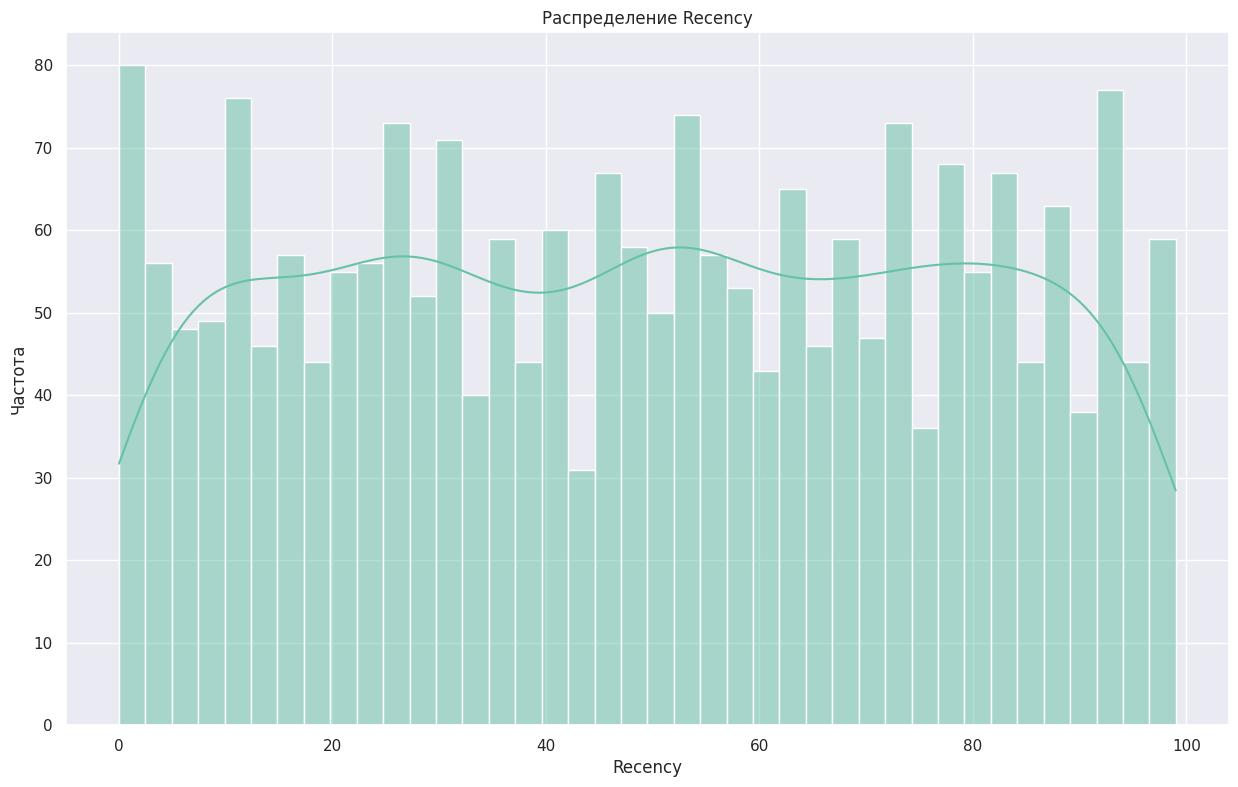

In [76]:
plt.figure(figsize=(15, 9))
sns.histplot(data["Recency"], bins=40, kde=True)
plt.title("Распределение Recency")
plt.xlabel("Recency")
plt.ylabel("Частота")
plt.show()

Теперь usage_time

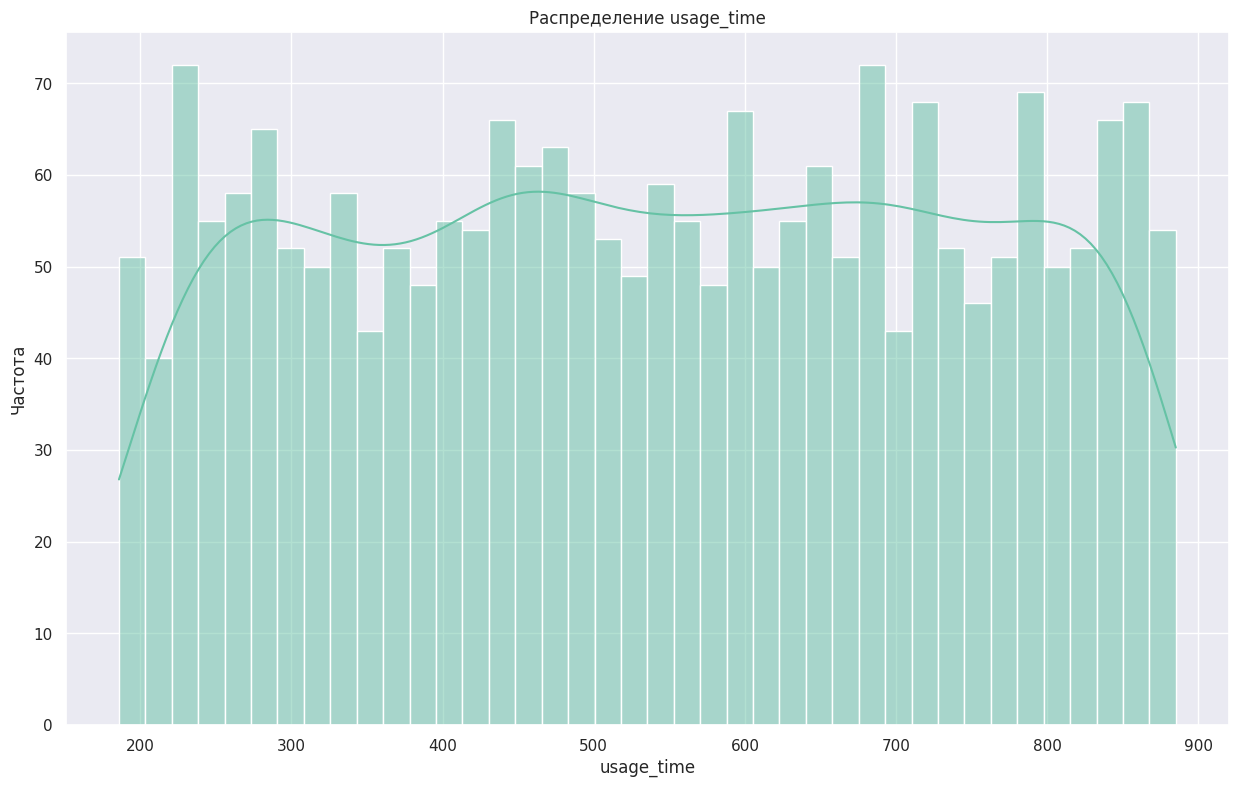

In [77]:
plt.figure(figsize=(15, 9))
sns.histplot(data["usage_time"], bins=40, kde=True)
plt.title("Распределение usage_time")
plt.xlabel("usage_time")
plt.ylabel("Частота")
plt.show()

Будем считать, что клиент ушел, если Recency >= 50

In [78]:
threshold = 50
data["Customer_Status"] = data["Recency"].apply(lambda x: "Churned" if x > threshold else "Active")


print(data["Customer_Status"].value_counts())

Customer_Status
Active     1144
Churned    1096
Name: count, dtype: int64


Посчитаем средние траты

In [79]:
data["Spending_Per_Day"] = data.apply(
    lambda row: row["usage_time"] - row["Recency"] if row["Customer_Status"] == "Churned" else row["usage_time"],
    axis=1
)

data["Spending_Per_Day"] = data["Total_Spending"] / data["Spending_Per_Day"]

Далее будем работать с признаками:
* возраст клиента
* предполагаемый размер семьи
* средние траты клиента в день
* `Income` &mdash; годовой доход клиента

Проведите графическое исследование признаков. При необходимости выполните предобработку, обосновав ее необходимость.

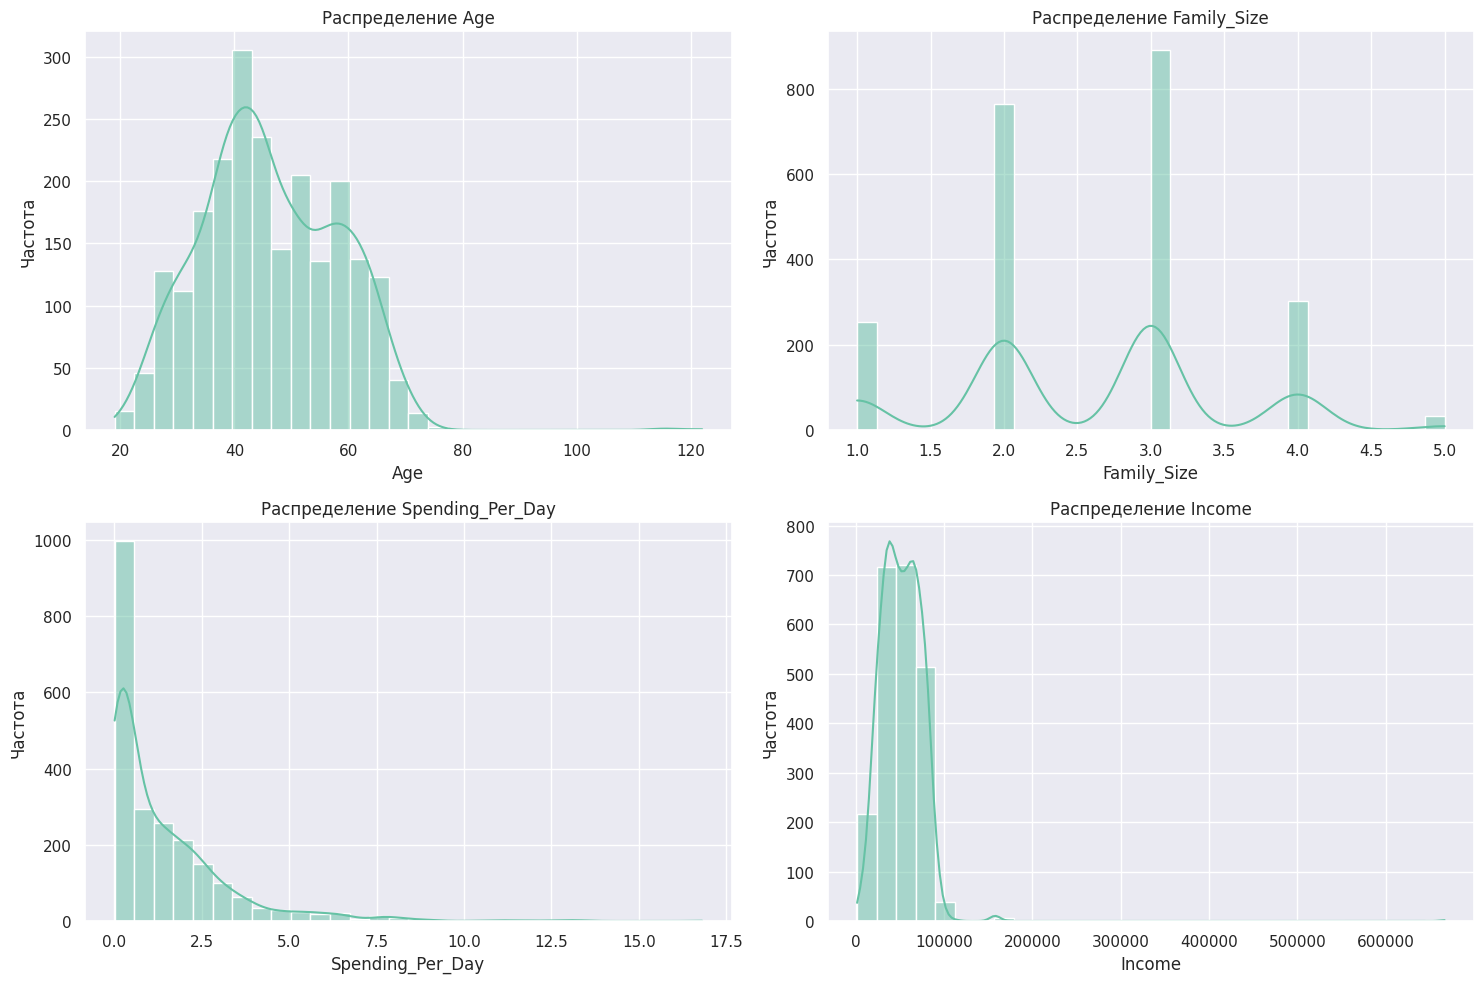

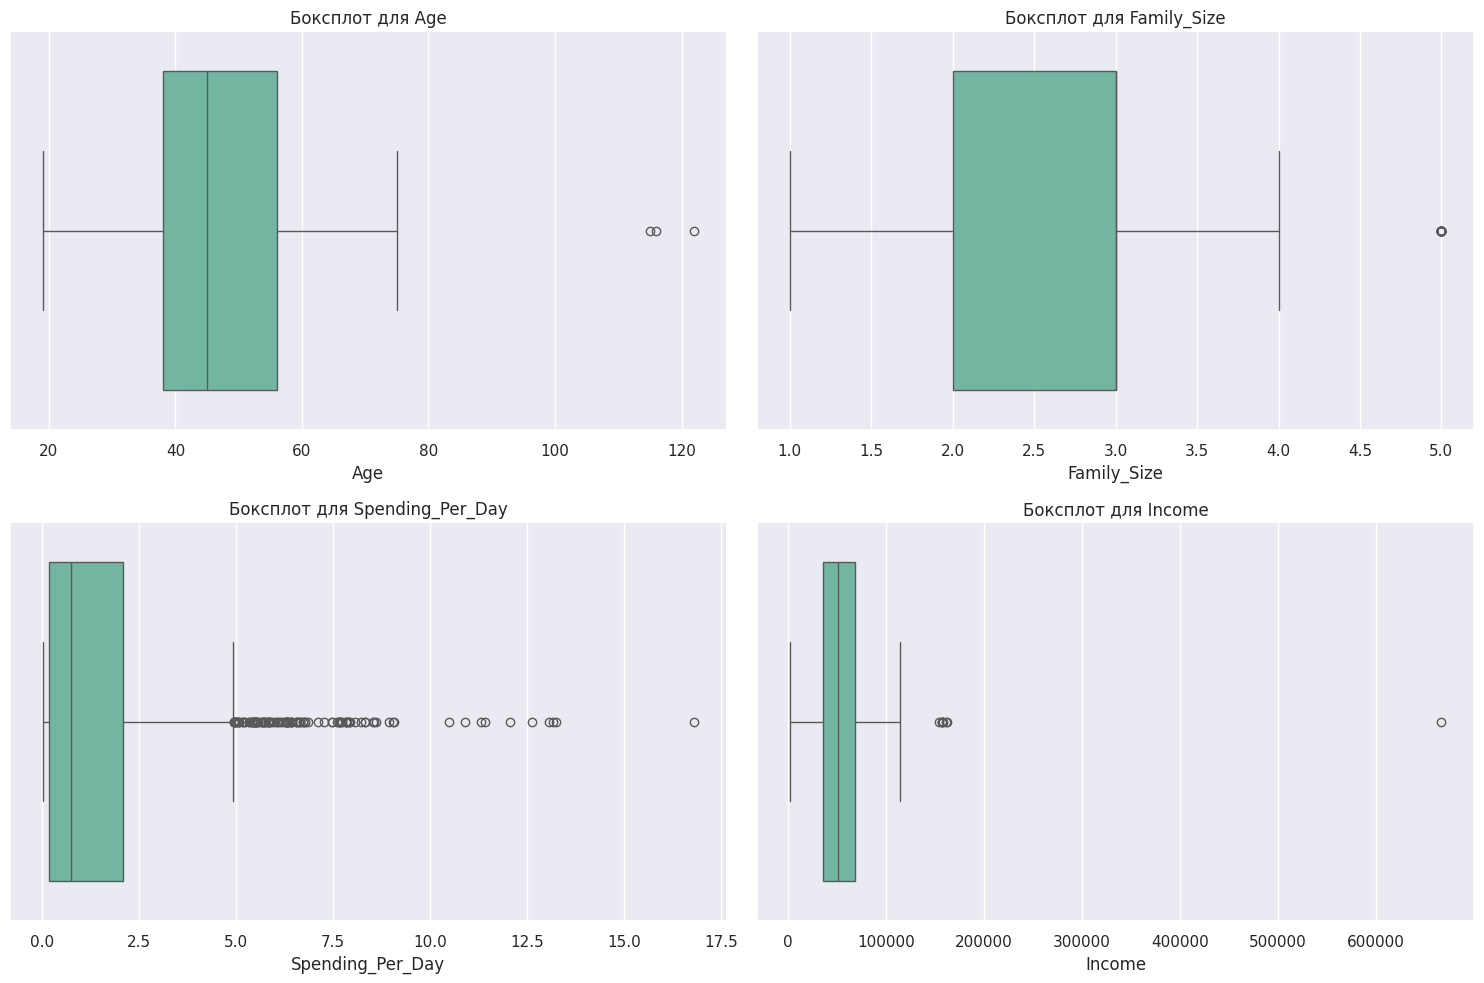

In [80]:
features = ["Age", "Family_Size", "Spending_Per_Day", "Income"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f"Распределение {feature}")
    plt.xlabel(feature)
    plt.ylabel("Частота")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(f"Боксплот для {feature}")
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

Есть явные выбросы в доходах и в возрасте, их стоит удалить, они могут испорить весь остальной анализ. Age, Income - распределены как Пуассон, Spending Per Day убывает, как экспоненциальное

In [81]:
Q1 = data["Income"].quantile(0.25)
Q3 = data["Income"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

size = data.shape

data = data[(data["Income"] <= upper_bound)]
data = data[(data["Age"] <= 100)]

print("Удалили данных")
print(size[0] - data.shape[0])

Удалили данных
35


Есть ли в полученных данных пропуски? Если да, то насколько много, можно ли их удалить?

In [84]:
data[features].isnull().sum()

Age                 0
Family_Size         0
Spending_Per_Day    0
Income              0
dtype: int64

Пропусков нет

Перейдем к кластеризации клиентов. Какой метод кластеризации будете использовать и почему? Как определить оптимальное количество кластеров или, в зависимости от метода, других гиперпараметров?

Выберу иерархическую кластеризация. Плюс в том, что данных мало, а она еще может помочь в визуализации кластеризации своей структурой, и показать как кластеры связаны

Выполните кластеризацию этим методом и подберите оптимальное количество гиперпараметров.

Подберем `n_clusters` по силуэтному коэффициенту

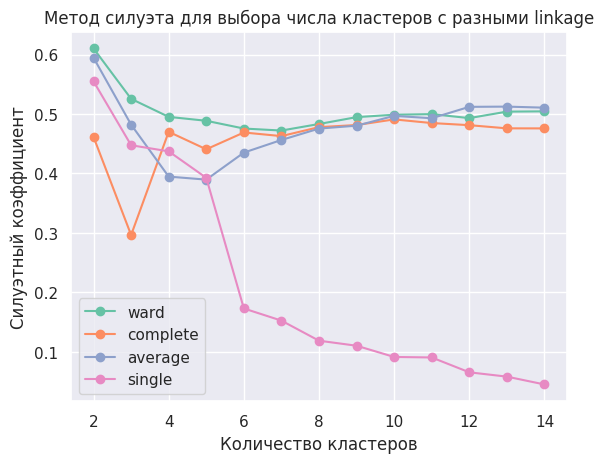

In [204]:
sil_scores = []
cluster_range = range(2, 15)

linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
    sil_scores_per_linkage = []
    for k in cluster_range:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        cluster_labels = model.fit_predict(data[features])
        sil_scores_per_linkage.append(silhouette_score(data[features], cluster_labels))
    
    plt.plot(cluster_range, sil_scores_per_linkage, marker='o', label=linkage)

plt.title('Метод силуэта для выбора числа кластеров с разными linkage')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.legend()
plt.show()

Подберем еще метрику

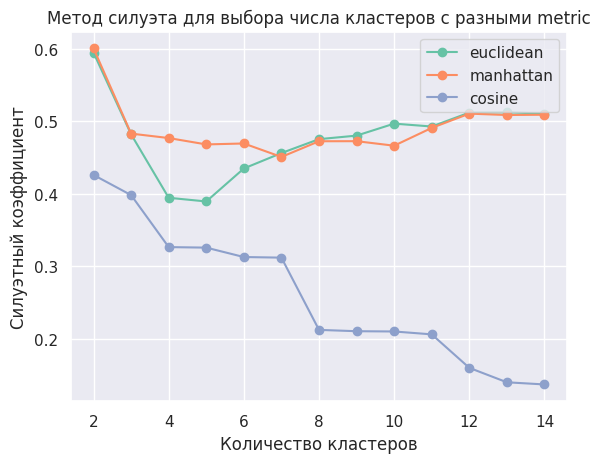

In [207]:
sil_scores = []
cluster_range = range(2, 15)

metrics = ['euclidean', 'manhattan', 'cosine'] 
for metric in metrics:
    sil_scores_per_metric = []
    for k in cluster_range:
        model = AgglomerativeClustering(n_clusters=k,
                                        metric=metric, linkage='average')
        cluster_labels = model.fit_predict(data[features])
        sil_scores_per_metric.append(silhouette_score(data[features], cluster_labels))
    
    plt.plot(cluster_range, sil_scores_per_metric,
             marker='o', label=metric)

plt.title('Метод силуэта для выбора числа кластеров с разными metric')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.legend()
plt.show()

Итого лучшая модель (возьмем побольше классов для анализа)

In [237]:
model = AgglomerativeClustering(n_clusters=5, metric='euclidean',
                                linkage='ward')

Сколько элементов в каждом из полученных кластеров?

Проинтерпретируйте полученные кластеры с помощью визуального анализа. Используйте различные типы графиков (например, box plot), изученные ранее. По каким признакам кластеры различаются, на сколько? Как можно описать клиентов каждого кластера?

Насколько кластеры соприкасаются друг с другом? Что можно сказать про клиентов на границе кластеров?

In [238]:
pd.DataFrame(model.fit_predict(data[features])).value_counts()

0
0    667
1    595
3    373
4    327
2    243
Name: count, dtype: int64

In [239]:
data['Cluster'] = model.fit_predict(data_scaled)
data[features + ['Cluster']].groupby("Cluster").mean()

Age  Family_Size  Spending_Per_Day        Income
Cluster                                                        
0        53.157542     2.486034          1.398991  57708.398883
1        50.928144     1.730539          5.878654  77867.119760
2        36.196339     2.515807          0.245082  30276.990017
3        49.740061     4.094801          0.523687  44849.590214
4        35.074419     1.679070          2.605579  75867.934884

Вышло совсем плохо. Один доминирующий над остальными кластер. Можно построить box-plot'ы

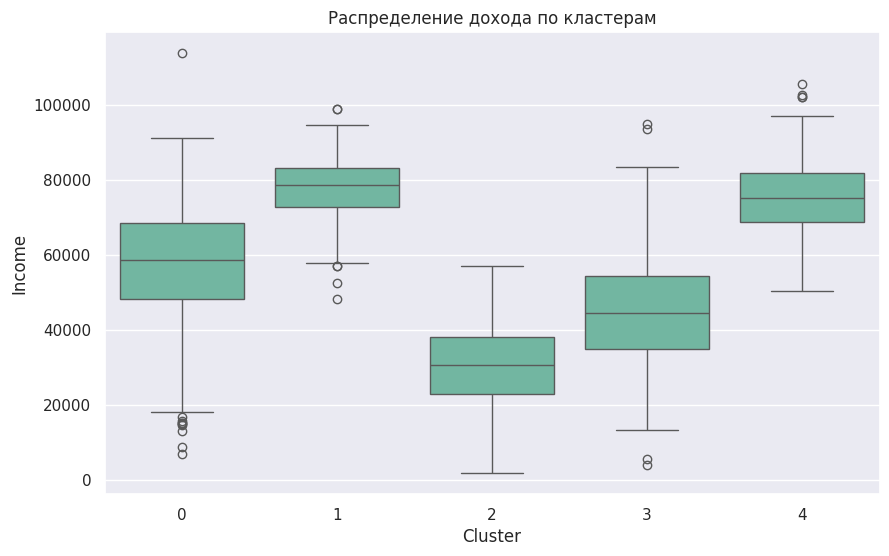

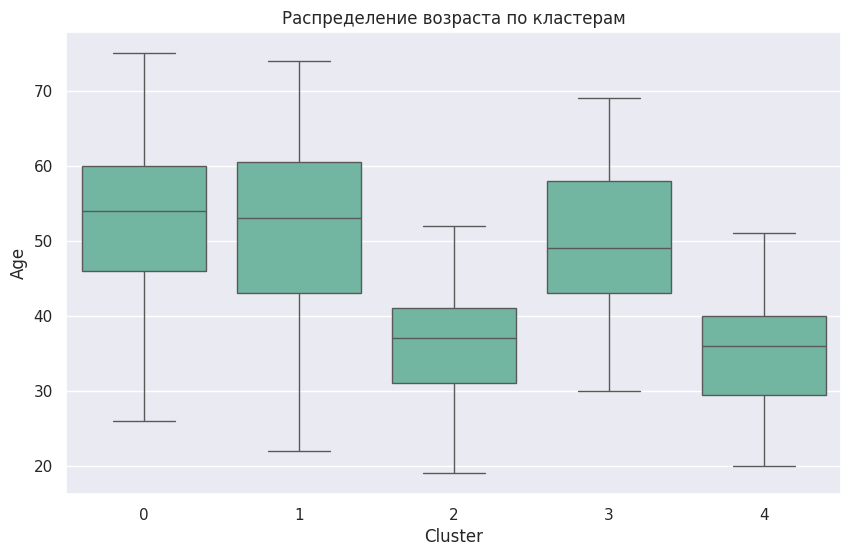

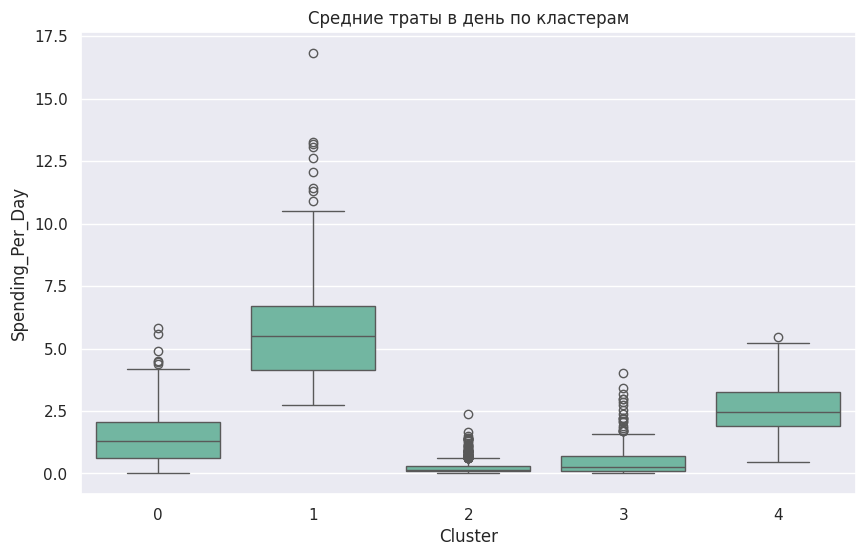

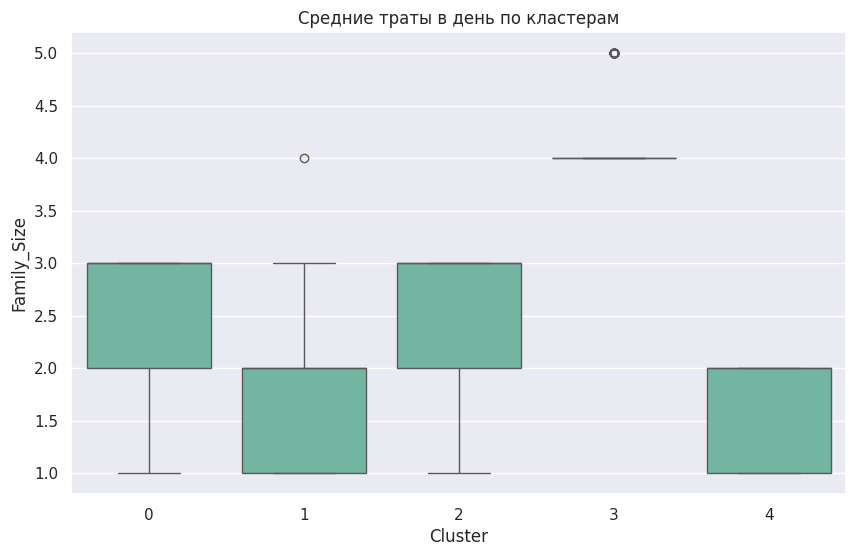

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Распределение дохода по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Распределение возраста по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending_Per_Day', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Family_Size', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

В основном разбивка по возрасту/тратам в день/размеру семьи

Есть старше-богаче; помоложе-победнее; с семьями-победнее

PCA проекция. В целом видно, что большая часть точек это один шум по центру, его кластеризовать сложно. Однако есть некоторая структура полученных класетров

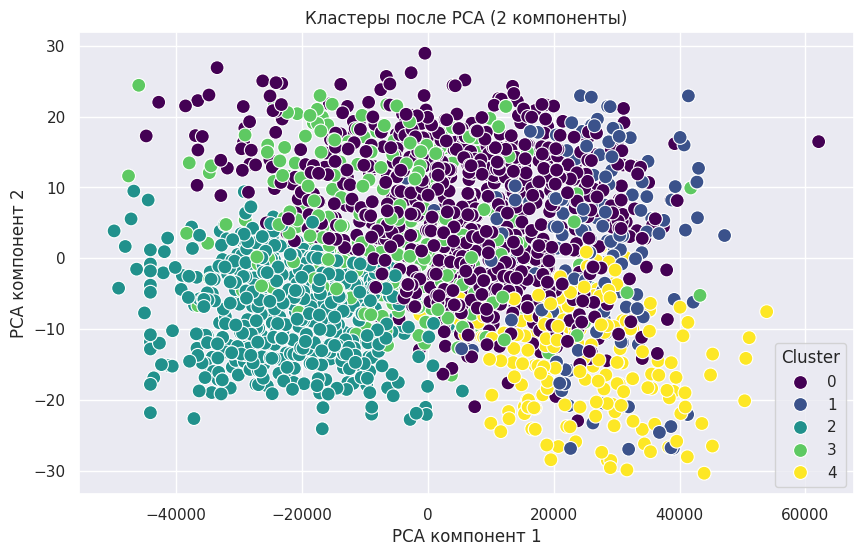

In [242]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1],
                hue=data['Cluster'], palette='viridis', s=100)
plt.title('Кластеры после PCA (2 компоненты)')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.show()

Попробуйте также применить другие изученные методы кластеризации. Насколько лучше или хуже получился результат?

Подберем параметры DBSCAN

In [257]:
eps_values = np.linspace(0.1, 0.5, 20)
min_samples_values = range(5, 30, 5)

sil_scores_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_scaled)

        if len(set(dbscan_labels)) > 1:
            sil_score = silhouette_score(data_scaled, dbscan_labels)
        else:
            sil_score = -1
        sil_scores_dbscan.append((eps, min_samples, sil_score))

best_params = max(sil_scores_dbscan, key=lambda x: x[2])
best_params

(0.5, 15, 0.09705147193841474)

Тут уже предсказание поинтереснее. Для начала число элементов в каждом классе

In [258]:
dbscan = DBSCAN(eps=0.5, min_samples=15)

Увы, это просто разбивка по размеру семьи

In [259]:
data['Cluster'] = dbscan.fit_predict(data_scaled)
data[features + ['Cluster']].groupby("Cluster").mean()

Age  Family_Size  Spending_Per_Day        Income
Cluster                                                        
-1       46.692607     1.906615          3.213124  66146.258755
 0       45.008373     3.000000          0.833126  46053.710526
 1       45.714044     2.000000          1.125631  50760.851100
 2       49.231061     4.000000          0.376079  42905.215909

Теперь то же самое на box-plot ах

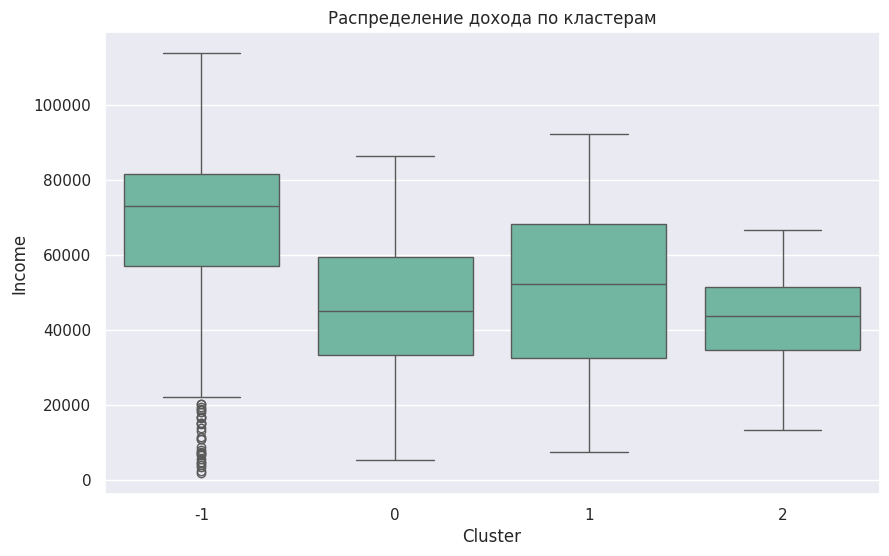

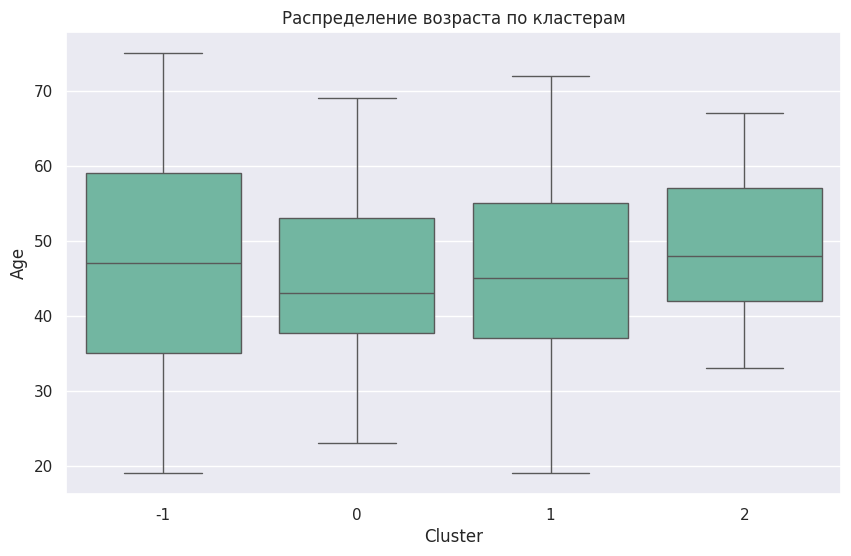

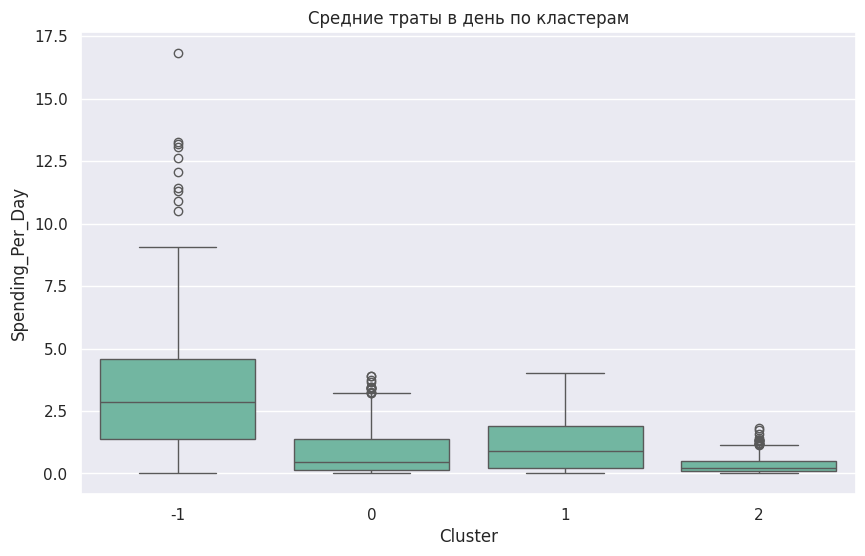

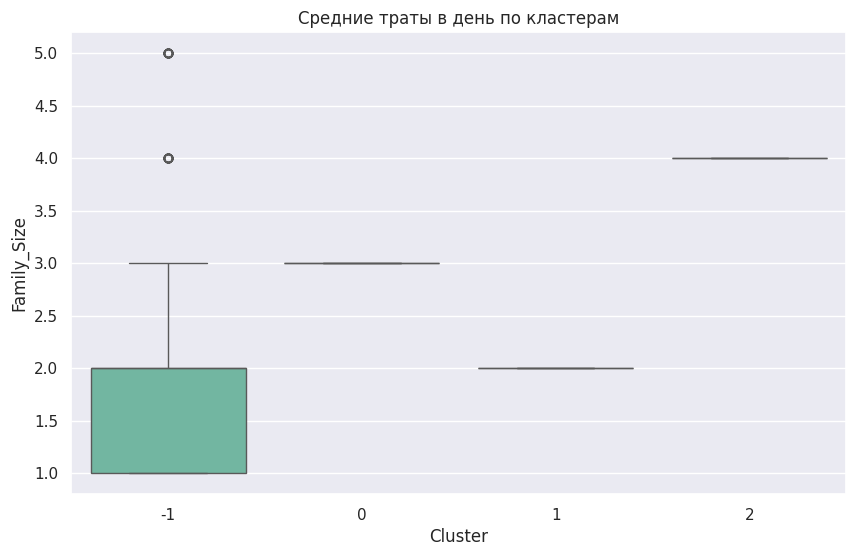

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Распределение дохода по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Распределение возраста по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending_Per_Day', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Family_Size', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

Можем еще посмотреть на PCA проекцию разных размеров семей

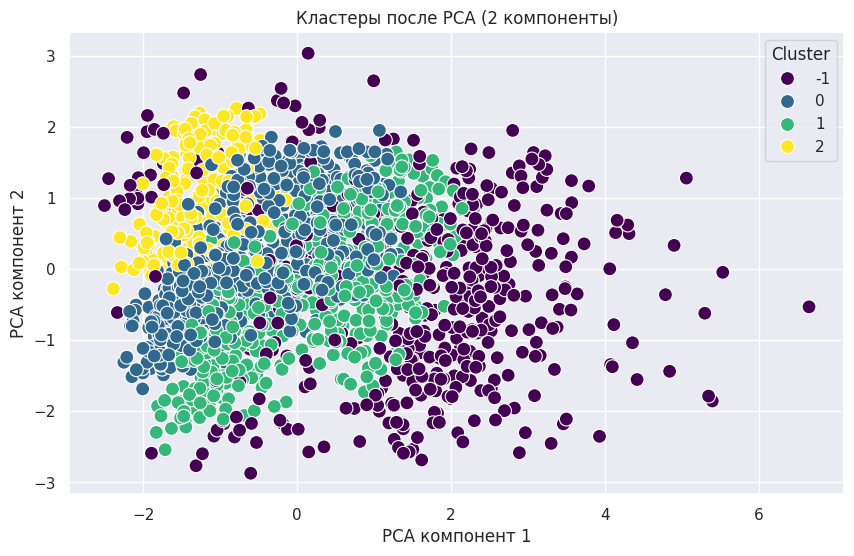

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Кластеры после PCA (2 компоненты)')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.show()


In [262]:
k_range = range(2, 15)
sil_scores_kmeans = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    sil_score = silhouette_score(data_scaled, kmeans_labels)
    sil_scores_kmeans.append(sil_score)

best_k = k_range[np.argmax(sil_scores_kmeans)]
best_k, max(sil_scores_kmeans)


(2, 0.3328272102491614)

График

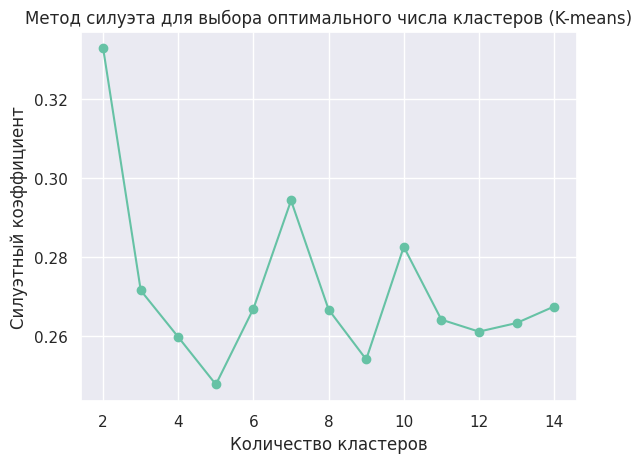

In [264]:
plt.plot(k_range, sil_scores_kmeans, marker='o')

plt.title('Метод силуэта для выбора оптимального числа кластеров (K-means)')

plt.xlabel('Количество кластеров')

plt.ylabel('Силуэтный коэффициент')

plt.show()

Возьмем побольше кластеров

In [269]:
model = KMeans(n_clusters=6)
pd.DataFrame(model.fit_predict(data[features])).value_counts()

0
3    454
0    406
4    399
2    370
1    346
5    230
Name: count, dtype: int64

Кластеры большие, это интересно

In [270]:
data['Cluster'] = model.fit_predict(data_scaled)
data[features + ['Cluster']].groupby("Cluster").mean()

Age  Family_Size  Spending_Per_Day        Income
Cluster                                                        
0        37.241002     2.496088          0.236331  30136.719875
1        48.281250     1.742188          6.643773  79554.570312
2        52.809745     3.705336          0.386152  41547.696056
3        43.962733     3.155280          1.730825  63605.152174
4        36.637736     1.675472          2.491787  73475.354717
5        59.614286     2.026190          1.731126  63160.678571

Проекция

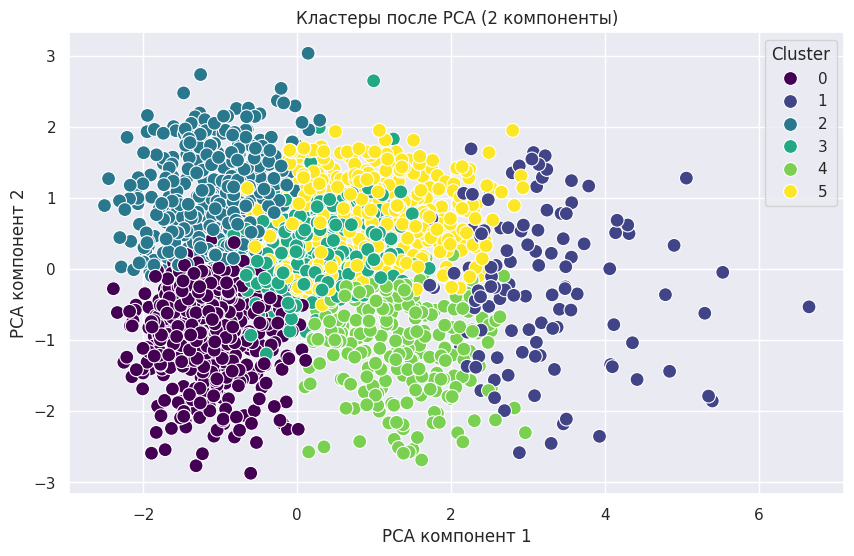

In [271]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Кластеры после PCA (2 компоненты)')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.show()


Осталось boxplot

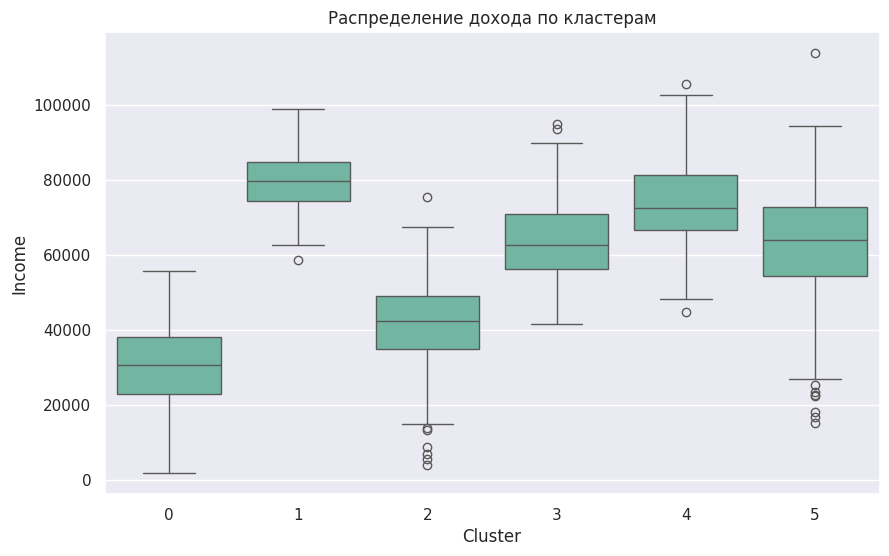

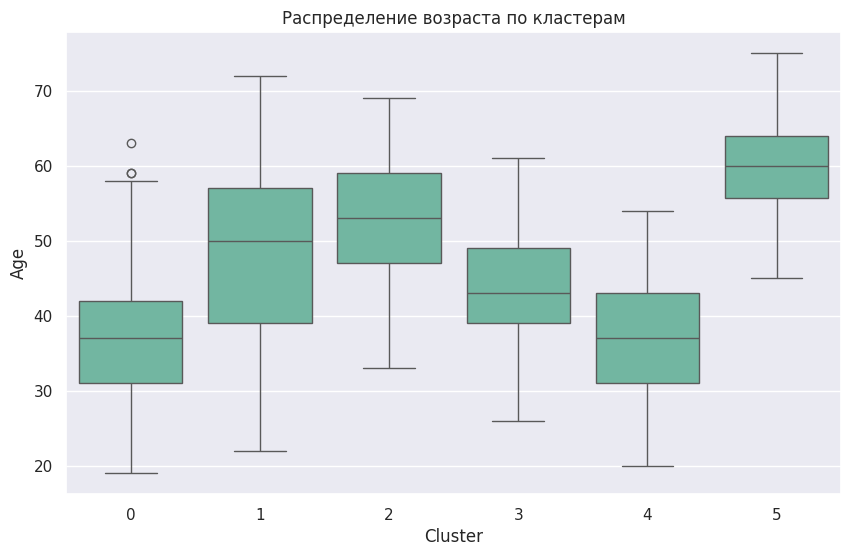

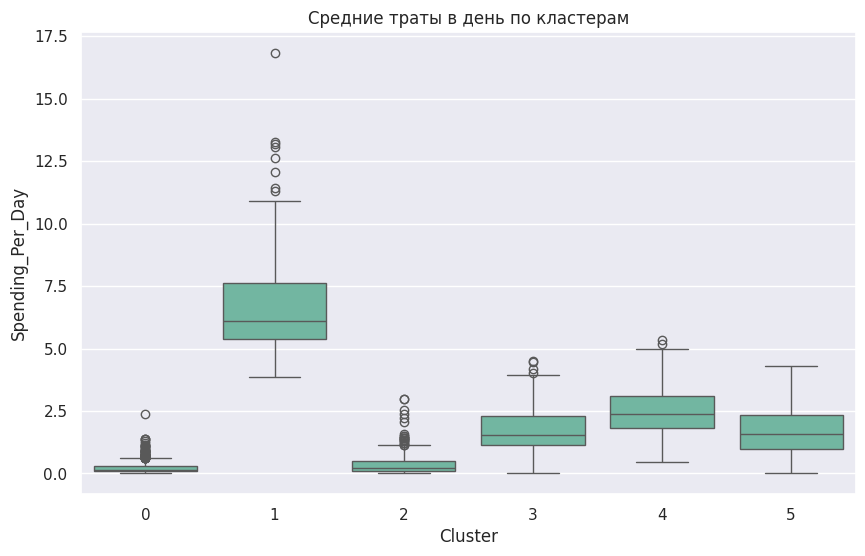

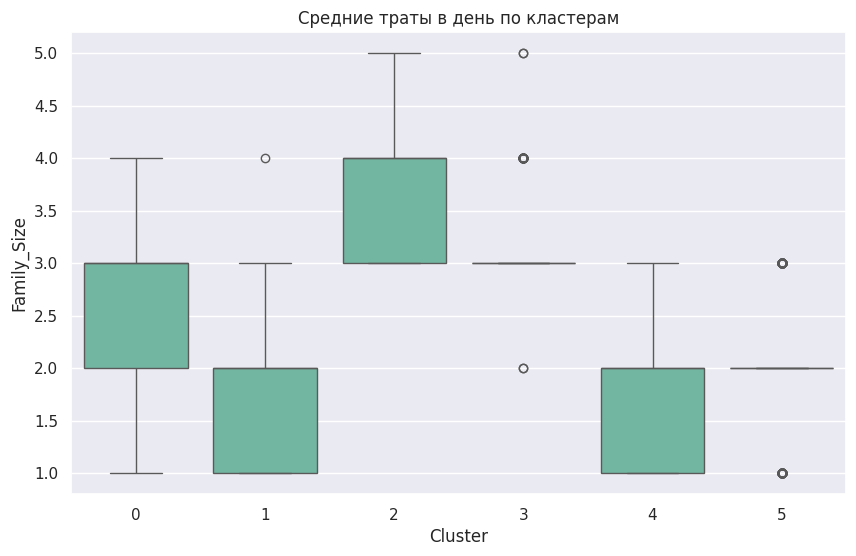

In [272]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Распределение дохода по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Распределение возраста по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending_Per_Day', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Family_Size', data=data)
plt.title('Средние траты в день по кластерам')
plt.show()

Такая же интересная разбивка по возрастам/тратам/семьям

Есть старше-богаче; помоложе-победнее; с семьями-победнее

Не забывайте про выводы.

Несмотря на простоту, kmeans дал легче интерпретируемый результат и само обучение метода оказалось более простым; для других методов приходится подбирать гиперпараметры. DBSCAN сломался на размере семьи.

При малом количестве данных агломеративная кластеризация может быть хорошим выбором, но для больших наборов данных она может быть медленной.

DBSCAN может лучше работать с данными, где кластеры имеют произвольные формы.
